# Time series forcesting fundamentals with TensorFlow + Milestone Project 3 : BitPredict

Let's wrtie some TesnroFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

**Note:** This is nont financial advice.

links :
* All resources: https://github.com/mrdbourke/tensorflow-deep-learning.
* Bo ok version of actual code/text : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/.

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here :

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-06 12:53:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-04-06 12:53:19 (7.10 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### importing time series

In [ ]:
# import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the data
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                        parse_dates = ["Date"],
                        index_col=["Date"]) # parse the data column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples do we have?
len(df)

2787

** Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


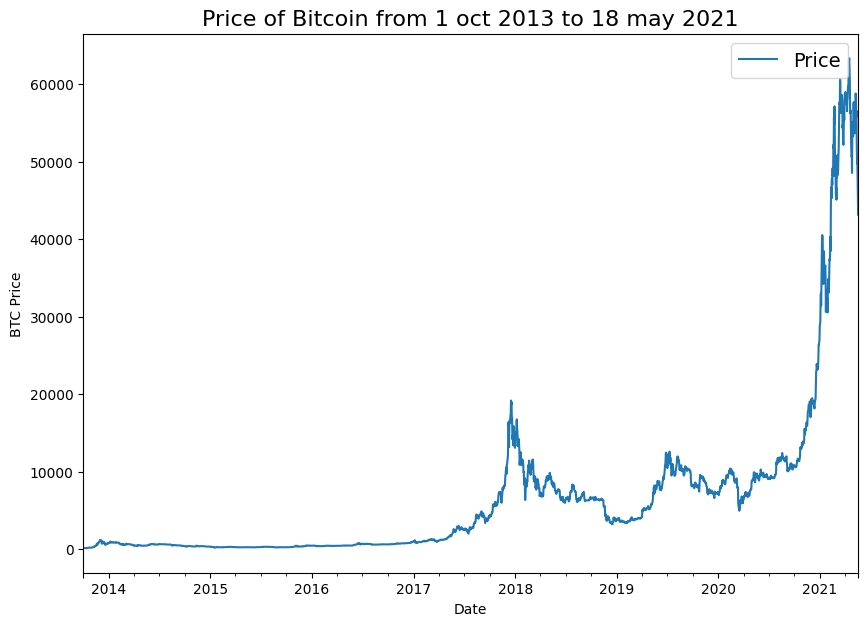

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 may 2021", fontsize=16)
plt.legend(fontsize=14)

### Importing time series data with Python's CSV module


In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter= ",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as date (not string)
    btc_price.append(float(line[2])) # get the closing price as floa

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

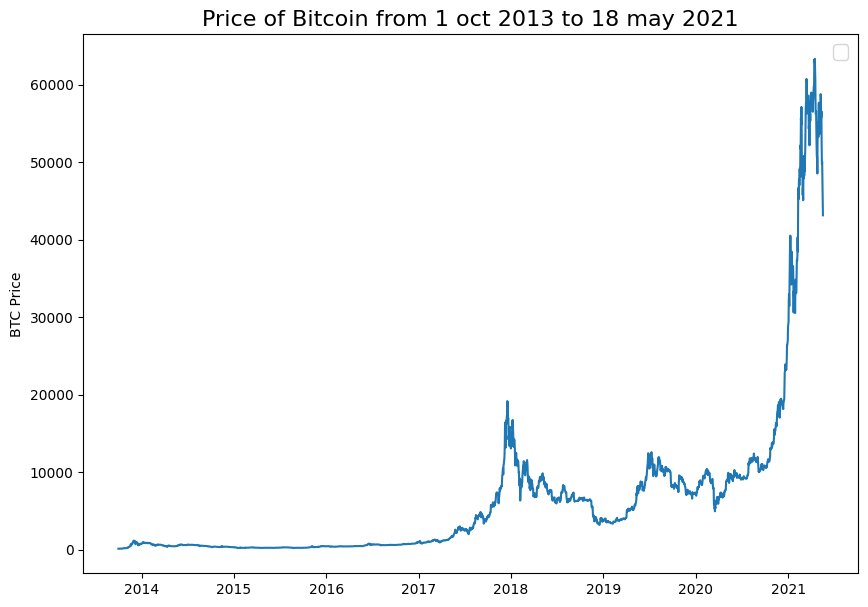

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 may 2021", fontsize=16)
plt.legend(fontsize=14)

## Format data part1: Create train and test sets of our time series data


### Creating train and test sets with time series data (the wrong way)

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

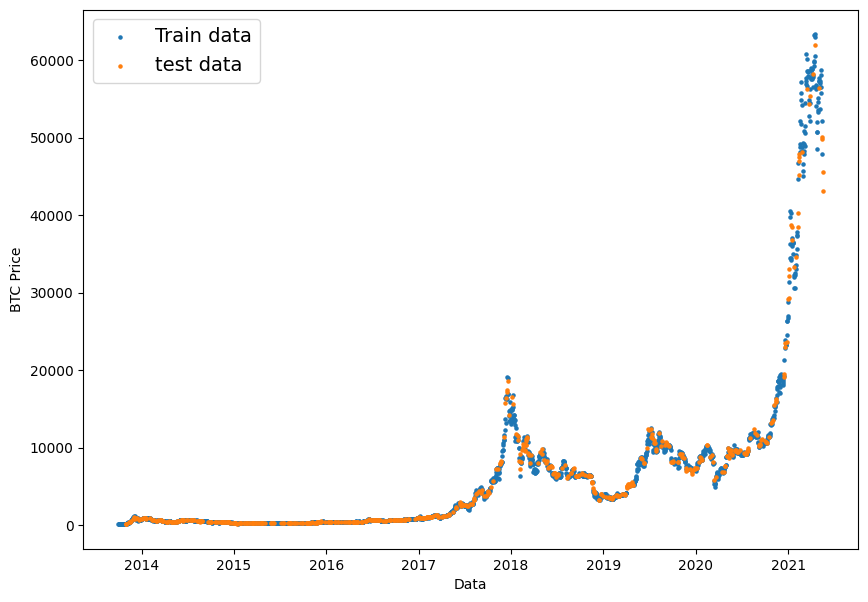

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices)) # 80% train, 20% test - you change these values as needed, e.g 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyind the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

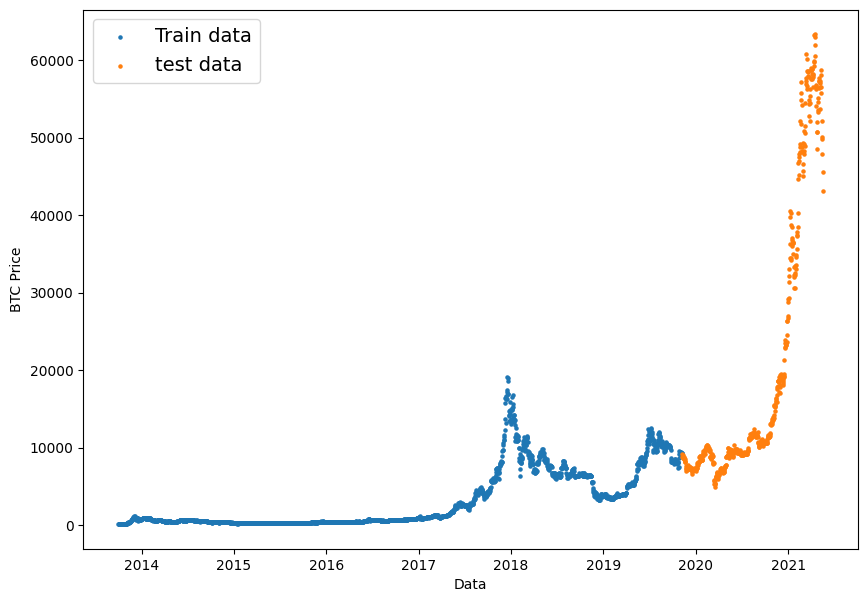

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function
Typing plotting code is tedious, let's functionize it.

In [ ]:
# Create the function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  # Plot correctly made splits
  """
  Plot timesteps (a series of points in time) against values (a series of values accros timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  #plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

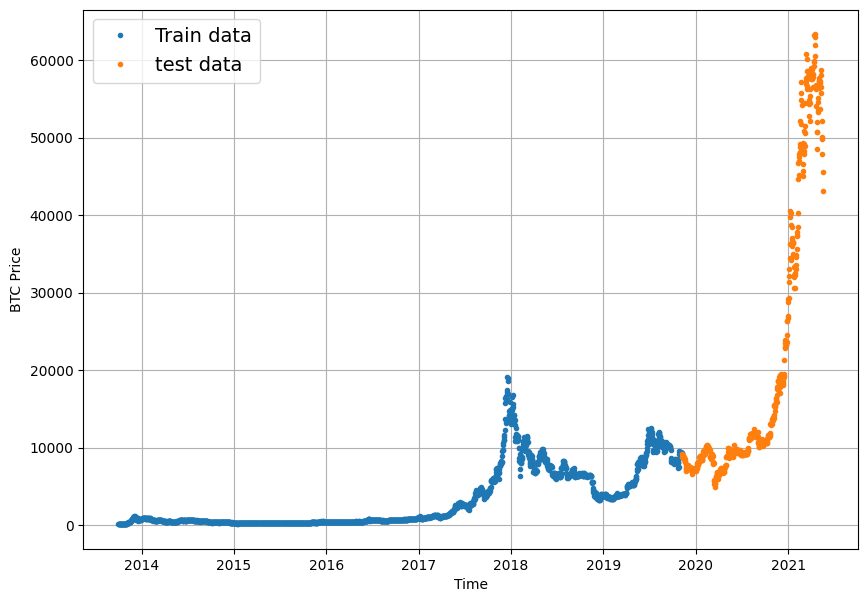

In [ ]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="test data")

## Modelling Experiments 

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with: 
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon  

Modelling experiments we're running:
 
* 0	Naïve model (baseline)
* 1	Dense model, horizon = 1, window =1
* 2	Same as 1, horizon = 1, window=	30
* 3	Same as 1, horizo1 = 7, window =	30
* 4	Conv1D	1	7
* 5	LSTM	1	7
* 6	Same as 1 (but with multivariate data)	1	7	Block reward size
* 7	N-BEATs Algorithm	1	7
* 8	Ensemble (multiple models optimized on different loss functions)	1	7
* 9	Future prediction model (model to predict future values)	1	7	
* 10	Same as 1 (but with turkey 🦃 data introduced)	1	7

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

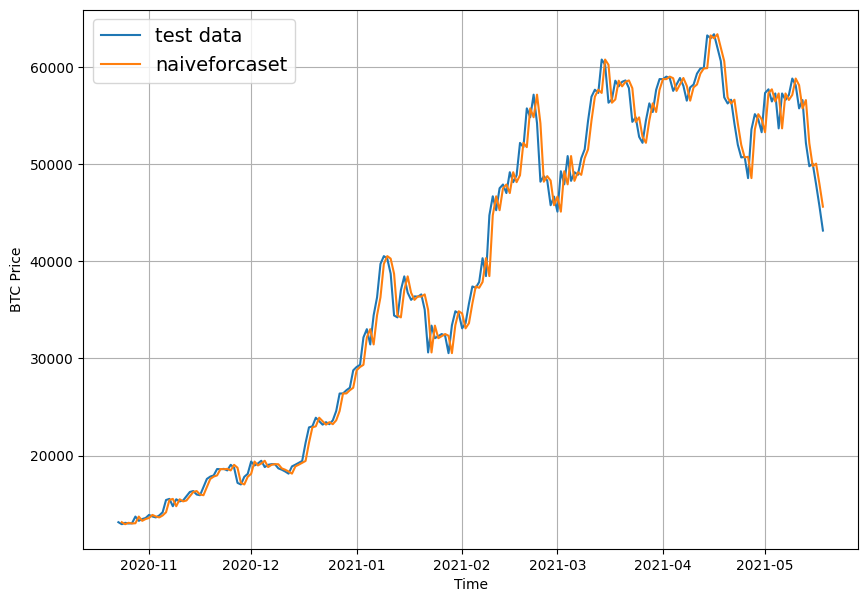

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, label="naiveforcaset", format="-")

> **Exercice:** Spend 10 minutes reading the simple forcasts chapter of Forcasting: Principles in Practice. ANd have a search to find out why the naive forcast is hard to beat, does the term autoregressive come up ?

## Evaluating a time series model 

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression like metrics.

A few common regression metrics (whhich can also be used for time series forecasting):
* MAE - mean absolute error.
* MSE - mean squared error.
* RMSE - root mean square error.
* MAPE/sMAPE - (symmetric) mean absolute percentage error.
* MASE - mean abslute scaled error.

For all of the above metrics, **lower is better** for example, for a model achieves an MAE of 0 that is better than an MAE of 100. 

The main thing we're evaluating here is : **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values) ?**

**Ressource: For a deeper dive on the various kinds of time series forecasting methode see Forecasting :[ Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html)**
https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.performance_metrics.forecasting.mean_absolute_scaled_error.html?highlight=MASE%20output%20is%20on#sktime.performance_metrics.forecasting.mean_absolute_scaled_error

In [ ]:
import tensorflow as tf 

In [ ]:
# MASE implementation
# calculate the mean absolute scaled error
# calculate the mean absolute scaled error

# scale = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
# error = tf.reduce_mean(tf.abs(y_pred - y_true))
# mase = error / scale

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
     
  # Find MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1))
     
  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics

import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Vérifier si y_true et y_pred ont la même forme
    if len(y_true.shape) > 1 or len(y_pred.shape) > 1:
      # Aplatir y_true et y_pred s'ils ont des formes différentes
      y_true = tf.reshape(y_true, [-1])
      y_pred = tf.reshape(y_pred, [-1])

    # Calculate various evaluation metrics 
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However therer are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window ?

We window our time series dataset to turn oue data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
len(y_train)

2229

In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]}  to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]  to predict this: 123.033


In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()}-> Label: {tf.squeeze(test_label.numpy())}")

Window: [0 1 2 3 4 5 6]-> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html

Our function will:
1. Create a window step of specific window size (e.g. [0,1,2,3,4,5,6])

2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0,1,2,3,4,5,6],
[0,1,2,3,4,5,6],
[0,1,2,3,4,5,6]]
```
3. Use the 2D array of multiple window steps (from 2. ) to index on a target series (e.g. historical price of Bitcoin)
4. Use our `get_labelled_windows()` function we created above to rurn the window steps into the window steps into windows with a specified horizon.

> **Resource:** The function we're about to create has been adapted from the following article : https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [ ]:
# Create function to view NumPy arrays as windows 

def make_windows(x, window_size= WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size 

  #print(f"Window indexes: \n{window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the firs 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [ ]:
prices[-1]

43144.4712908603

**Note:** You can find a function which achieves similar results to the ones we implemented above at [tf.keras.preprocessing.timeseries_dataset_from_array() ](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array). Just like ours, it takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a tf.data.Dataset instance (we'll see how to do this with our own data later).

## Turning windows into training and test sets

In [ ]:
#full_windows : c'est la separation du dataset sous forme listes de liste x c'est le nombre de windows pour ensuite determiné l horizon qui est windows +1, la valeur qui suit le window (ex 7 pour window et le 8eme  c'est l'horizon )

In [ ]:
full_windows[1], full_labels[1]


(array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ]),
 array([124.049]))

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
# check to see if train labels are the same (before and after window split )
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:]) 

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're goind to write a model checkpoint so we can compare apples to appeles.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example f our model performs the best on epoch 55 (but we're training for 100 epochs), we want to lead and evaluate the model saved on epoch 55. 

We can create a modelling checkpoint callback using this following : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint 

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(
      filepath=os.path.join(save_path, model_name),
      verbose=0, # only output a limited amount of text
      #monitor='val_loss',  # monitor validation loss
      #mode='min',  # minimize validation loss
      save_best_only=True  # save only the best model
      )

## Model 1 : Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs 

Why these values?

I picked them out of experimentation.

*  **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves.
* **Parameters** = values a model learns on its own.

In [ ]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it 

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 20s - loss: 4121.5830 - mae: 4121.5830 - mse: 34947848.0000

18/18 [==============================] - 2s 64ms/step - loss: 1726.9252 - mae: 1726.9252 - mse: 10474698.0000 - val_loss: 3061.1541 - val_mae: 3061.1541 - val_mse: 21161960.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 452.2578 - mae: 452.2578 - mse: 857837.0000

18/18 [==============================] - 1s 46ms/step - loss: 421.6263 - mae: 421.6263 - mse: 665495.9375 - val_loss: 1946.7679 - val_mae: 1946.7679 - val_mse: 8965418.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 258.6300 - mae: 258.6300 - mse: 222716.9688

18/18 [==============================] - 1s 43ms/step - loss: 221.9515 - mae: 221.9515 - mse: 236970.1562 - val_loss: 1355.2028 - val_mae: 1355.2028 - val_mse: 4801196.5000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 184.4109 - mae: 184.4109 - mse: 176337.0312

18/18 [==============================] - 1s 46ms/step - loss: 182.4041 - mae: 182.4041 - mse: 173314.0938 - val_loss: 974.6564 - val_mae: 974.6564 - val_mse: 3130386.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 169.8467 - mae: 169.8467 - mse: 102924.7344

18/18 [==============================] - 1s 44ms/step - loss: 171.0343 - mae: 171.0343 - mse: 156687.1719 - val_loss: 940.7361 - val_mae: 940.7361 - val_mse: 2970664.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 131.7250 - mae: 131.7250 - mse: 66217.6875

18/18 [==============================] - 1s 41ms/step - loss: 169.2438 - mae: 169.2438 - mse: 150289.3594 - val_loss: 913.7040 - val_mae: 913.7040 - val_mse: 2803214.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 205.6165 - mae: 205.6165 - mse: 300113.9062

18/18 [==============================] - 1s 43ms/step - loss: 161.0345 - mae: 161.0345 - mse: 138087.9062 - val_loss: 871.1046 - val_mae: 871.1046 - val_mse: 2512836.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4019 - mae: 136.4019 - mse: 77835.2188

18/18 [==============================] - 1s 43ms/step - loss: 150.6420 - mae: 150.6420 - mse: 124433.7266 - val_loss: 826.5746 - val_mae: 826.5746 - val_mse: 2332681.7500
Epoch 9/100
12/18 [===================>..........] - ETA: 0s - loss: 151.5217 - mae: 151.5217 - mse: 120880.2266

18/18 [==============================] - 1s 44ms/step - loss: 149.2746 - mae: 149.2746 - mse: 120904.6641 - val_loss: 805.0013 - val_mae: 805.0013 - val_mse: 2169251.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 156.6690 - mae: 156.6690 - mse: 169332.2812

18/18 [==============================] - 1s 74ms/step - loss: 144.7908 - mae: 144.7908 - mse: 115634.7500 - val_loss: 788.4688 - val_mae: 788.4689 - val_mse: 2061515.5000
Epoch 11/100
 9/18 [==============>...............] - ETA: 0s - loss: 136.9597 - mae: 136.9597 - mse: 110899.4062

18/18 [==============================] - 2s 98ms/step - loss: 138.4444 - mae: 138.4444 - mse: 106022.1328 - val_loss: 778.1485 - val_mae: 778.1485 - val_mse: 1977070.2500
Epoch 12/100
18/18 [==============================] - 0s 22ms/step - loss: 135.5217 - mae: 135.5217 - mse: 102698.8281 - val_loss: 805.8860 - val_mae: 805.8860 - val_mse: 1993474.5000
Epoch 13/100
18/18 [==============================] - 0s 19ms/step - loss: 135.4163 - mae: 135.4163 - mse: 101892.5859 - val_loss: 792.0107 - val_mae: 792.0107 - val_mse: 1924343.2500
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 127.7392 - mae: 127.7392 - mse: 90577.4141

18/18 [==============================] - 3s 153ms/step - loss: 130.8704 - mae: 130.8704 - mse: 96054.5703 - val_loss: 742.2849 - val_mae: 742.2849 - val_mse: 1769262.1250
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 131.9349 - mae: 131.9349 - mse: 95589.7031

18/18 [==============================] - 2s 106ms/step - loss: 132.0848 - mae: 132.0848 - mse: 95372.4297 - val_loss: 718.0157 - val_mae: 718.0157 - val_mse: 1682153.5000
Epoch 16/100
18/18 [==============================] - 0s 13ms/step - loss: 125.5210 - mae: 125.5210 - mse: 88372.1797 - val_loss: 743.5128 - val_mae: 743.5128 - val_mse: 1723730.6250
Epoch 17/100
13/18 [====================>.........] - ETA: 0s - loss: 125.5998 - mae: 125.5998 - mse: 88074.5938

18/18 [==============================] - 2s 93ms/step - loss: 123.6404 - mae: 123.6404 - mse: 87181.8281 - val_loss: 704.6346 - val_mae: 704.6346 - val_mse: 1605252.3750
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 125.1390 - mae: 125.1390 - mse: 89788.3281

18/18 [==============================] - 2s 107ms/step - loss: 122.1201 - mae: 122.1201 - mse: 85607.4766 - val_loss: 660.9261 - val_mae: 660.9261 - val_mse: 1512345.8750
Epoch 19/100
18/18 [==============================] - 0s 14ms/step - loss: 121.3054 - mae: 121.3054 - mse: 85457.0859 - val_loss: 706.2843 - val_mae: 706.2843 - val_mse: 1582697.3750
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 120.9057 - mae: 120.9057 - mse: 83710.8203 

18/18 [==============================] - 2s 114ms/step - loss: 119.6115 - mae: 119.6115 - mse: 82085.8750 - val_loss: 645.3093 - val_mae: 645.3093 - val_mse: 1439679.2500
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 124.3083 - mae: 124.3083 - mse: 83958.6875

18/18 [==============================] - 2s 115ms/step - loss: 121.5795 - mae: 121.5795 - mse: 85262.2969 - val_loss: 637.0396 - val_mae: 637.0396 - val_mse: 1410887.3750
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 123.1272 - mae: 123.1272 - mse: 91435.2578 

18/18 [==============================] - 3s 165ms/step - loss: 117.6457 - mae: 117.6457 - mse: 81405.0469 - val_loss: 633.0447 - val_mae: 633.0447 - val_mse: 1388579.2500
Epoch 23/100
11/18 [=================>............] - ETA: 0s - loss: 117.3968 - mae: 117.3968 - mse: 74717.0938

18/18 [==============================] - 2s 96ms/step - loss: 118.9002 - mae: 118.9002 - mse: 80759.6875 - val_loss: 624.4489 - val_mae: 624.4489 - val_mse: 1367166.8750
Epoch 24/100
18/18 [==============================] - 0s 15ms/step - loss: 117.5472 - mae: 117.5472 - mse: 81360.3047 - val_loss: 631.4542 - val_mae: 631.4542 - val_mse: 1394940.2500
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 116.3845 - mae: 116.3845 - mse: 78524.0469

18/18 [==============================] - 1s 79ms/step - loss: 115.9545 - mae: 115.9545 - mse: 77727.4375 - val_loss: 613.7823 - val_mae: 613.7823 - val_mse: 1333161.2500
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 111.9613 - mae: 111.9613 - mse: 66174.1172

18/18 [==============================] - 1s 83ms/step - loss: 115.6749 - mae: 115.6749 - mse: 77635.0781 - val_loss: 612.0974 - val_mae: 612.0974 - val_mse: 1321697.3750
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 118.2128 - mae: 118.2128 - mse: 77942.0859 

18/18 [==============================] - 1s 75ms/step - loss: 116.6905 - mae: 116.6905 - mse: 77446.8203 - val_loss: 610.3682 - val_mae: 610.3682 - val_mse: 1325213.7500
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 111.9845 - mae: 111.9845 - mse: 75932.7422

18/18 [==============================] - 1s 81ms/step - loss: 113.5103 - mae: 113.5103 - mse: 76466.7734 - val_loss: 604.2833 - val_mae: 604.2833 - val_mse: 1298413.8750
Epoch 29/100
18/18 [==============================] - 0s 15ms/step - loss: 112.5977 - mae: 112.5977 - mse: 75702.0859 - val_loss: 612.0433 - val_mae: 612.0433 - val_mse: 1305225.3750
Epoch 30/100
11/18 [=================>............] - ETA: 0s - loss: 113.7385 - mae: 113.7385 - mse: 76741.0703

18/18 [==============================] - 2s 94ms/step - loss: 117.4713 - mae: 117.4713 - mse: 78865.9297 - val_loss: 597.3291 - val_mae: 597.3291 - val_mse: 1282491.3750
Epoch 31/100
18/18 [==============================] - 0s 13ms/step - loss: 116.6527 - mae: 116.6527 - mse: 76189.5781 - val_loss: 627.2623 - val_mae: 627.2623 - val_mse: 1330091.2500
Epoch 32/100
18/18 [==============================] - 0s 9ms/step - loss: 113.6002 - mae: 113.6002 - mse: 77873.4609 - val_loss: 598.6851 - val_mae: 598.6851 - val_mse: 1284512.5000
Epoch 33/100
18/18 [==============================] - 0s 13ms/step - loss: 114.2629 - mae: 114.2629 - mse: 77259.0469 - val_loss: 664.1523 - val_mae: 664.1523 - val_mse: 1409585.6250
Epoch 34/100
18/18 [==============================] - 0s 15ms/step - loss: 113.4965 - mae: 113.4965 - mse: 76560.1562 - val_loss: 598.2759 - val_mae: 598.2759 - val_mse: 1278302.8750
Epoch 35/100
18/18 [==============================] - 0s 16ms/step - loss: 111.4857 - mae: 111.4857

18/18 [==============================] - 1s 75ms/step - loss: 113.3322 - mae: 113.3322 - mse: 75639.1250 - val_loss: 586.5933 - val_mae: 586.5933 - val_mse: 1247451.8750
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2332 - mae: 110.2332 - mse: 74009.1484 - val_loss: 596.0190 - val_mae: 596.0190 - val_mse: 1255175.8750
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1781 - mae: 113.1781 - mse: 75293.5625 - val_loss: 601.0371 - val_mae: 601.0371 - val_mse: 1275209.0000
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 109.5432 - mae: 109.5432 - mse: 73555.5391 

18/18 [==============================] - 1s 85ms/step - loss: 110.1178 - mae: 110.1178 - mse: 74067.5312 - val_loss: 583.0055 - val_mae: 583.0055 - val_mse: 1236621.3750
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0065 - mae: 110.0065 - mse: 73182.5547 - val_loss: 583.2844 - val_mae: 583.2844 - val_mse: 1236352.7500
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1607 - mae: 110.1607 - mse: 73458.4688 - val_loss: 648.4211 - val_mae: 648.4211 - val_mse: 1381462.0000
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 119.1350 - mae: 119.1350 - mse: 78871.9141 - val_loss: 626.5188 - val_mae: 626.5188 - val_mse: 1308280.0000
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5437 - mae: 114.5437 - mse: 73582.5156 - val_loss: 654.9880 - val_mae: 654.9880 - val_mse: 1394651.6250
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3299 - mae: 115.3299 - m

18/18 [==============================] - 1s 42ms/step - loss: 108.5423 - mae: 108.5423 - mse: 71246.7188 - val_loss: 577.9009 - val_mae: 577.9009 - val_mse: 1208066.1250
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6979 - mae: 113.6979 - mse: 75782.5312 - val_loss: 598.7646 - val_mae: 598.7646 - val_mse: 1240361.2500
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1058 - mae: 115.1058 - mse: 74843.7891 - val_loss: 859.6469 - val_mae: 859.6469 - val_mse: 2060846.5000
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 140.3604 - mae: 140.3604 - mse: 95706.7500 - val_loss: 766.5969 - val_mae: 766.5969 - val_mse: 1724397.3750
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 120.4142 - mae: 120.4142 - mse: 77754.3516 - val_loss: 600.6533 - val_mae: 600.6533 - val_mse: 1248787.8750
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 74.9281 - mae: 74.9281 - mse: 33

18/18 [==============================] - 1s 43ms/step - loss: 109.7615 - mae: 109.7615 - mse: 72155.1953 - val_loss: 577.8474 - val_mae: 577.8474 - val_mse: 1205695.0000
Epoch 60/100
17/18 [===========================>..] - ETA: 0s - loss: 107.3945 - mae: 107.3945 - mse: 69281.2812

18/18 [==============================] - 1s 43ms/step - loss: 108.4550 - mae: 108.4550 - mse: 71456.5156 - val_loss: 571.2179 - val_mae: 571.2179 - val_mse: 1193530.0000
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 108.8166 - mae: 108.8166 - mse: 72345.0703 - val_loss: 596.7246 - val_mae: 596.7246 - val_mse: 1232901.3750
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8432 - mae: 109.8432 - mse: 72022.3594 - val_loss: 586.7110 - val_mae: 586.7110 - val_mse: 1217114.1250
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9968 - mae: 110.9968 - mse: 72976.8672 - val_loss: 635.1160 - val_mae: 635.1160 - val_mse: 1314323.7500
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0200 - mae: 111.0200 - mse: 72540.1953 - val_loss: 573.4755 - val_mae: 573.4755 - val_mse: 1190694.8750
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4795 - mae: 109.4795 - m

18/18 [==============================] - 1s 43ms/step - loss: 108.7150 - mae: 108.7150 - mse: 69659.2578 - val_loss: 569.8340 - val_mae: 569.8340 - val_mse: 1184405.7500
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5336 - mae: 114.5336 - mse: 72563.0312 - val_loss: 706.1295 - val_mae: 706.1295 - val_mse: 1487917.2500
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 121.8611 - mae: 121.8611 - mse: 77637.4141 - val_loss: 569.9572 - val_mae: 569.9572 - val_mse: 1183622.8750
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4703 - mae: 110.4703 - mse: 70936.9453 - val_loss: 572.9140 - val_mae: 572.9140 - val_mse: 1189229.6250
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0597 - mae: 111.0597 - mse: 72181.9922 - val_loss: 574.1049 - val_mae: 574.1049 - val_mse: 1185831.6250
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6889 - mae: 108.6889 - m

18/18 [==============================] - 1s 43ms/step - loss: 110.4429 - mae: 110.4429 - mse: 72572.2031 - val_loss: 567.0865 - val_mae: 567.0865 - val_mse: 1176992.0000
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6543 - mae: 108.6543 - mse: 70577.3750 - val_loss: 568.7352 - val_mae: 568.7352 - val_mse: 1178942.1250
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1825 - mae: 111.1825 - mse: 72141.8438 - val_loss: 581.9272 - val_mae: 581.9272 - val_mse: 1195305.5000
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7360 - mae: 110.7360 - mse: 71737.1016 - val_loss: 599.7969 - val_mae: 599.7969 - val_mse: 1235193.3750
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4830 - mae: 108.4830 - mse: 69844.0156 - val_loss: 599.9413 - val_mae: 599.9413 - val_mse: 1235213.1250
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3126 - mae: 108.3126 - m

18/18 [==============================] - 1s 42ms/step - loss: 108.9610 - mae: 108.9610 - mse: 71376.0234 - val_loss: 565.9421 - val_mae: 565.9421 - val_mse: 1169230.5000
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2094 - mae: 117.2094 - mse: 77575.6484 - val_loss: 573.7429 - val_mae: 573.7429 - val_mse: 1178857.6250
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6647 - mae: 114.6647 - mse: 74799.6250 - val_loss: 691.4869 - val_mae: 691.4869 - val_mse: 1462791.1250
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9137 - mae: 115.9137 - mse: 73847.4141 - val_loss: 600.6902 - val_mae: 600.6902 - val_mse: 1234935.7500
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6319 - mae: 108.6319 - mse: 71166.8125 - val_loss: 571.1526 - val_mae: 571.1526 - val_mse: 1174036.6250
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9929 - mae: 107.9929 - m

18/18 [==============================] - 1s 66ms/step - loss: 108.9566 - mae: 108.9566 - mse: 71057.1172 - val_loss: 564.2201 - val_mae: 564.2201 - val_mse: 1165013.1250
Epoch 92/100
18/18 [==============================] - 0s 9ms/step - loss: 113.7695 - mae: 113.7695 - mse: 74227.0234 - val_loss: 607.8452 - val_mae: 607.8452 - val_mse: 1248324.1250
Epoch 93/100
18/18 [==============================] - 0s 9ms/step - loss: 122.0441 - mae: 122.0441 - mse: 78150.4531 - val_loss: 615.2121 - val_mae: 615.2121 - val_mse: 1264995.5000
Epoch 94/100
18/18 [==============================] - 0s 11ms/step - loss: 111.4964 - mae: 111.4964 - mse: 72945.7891 - val_loss: 571.6010 - val_mae: 571.6010 - val_mse: 1172652.3750
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 105.7821 - mae: 105.7821 - mse: 67940.7500 - val_loss: 567.1415 - val_mae: 567.1415 - val_mse: 1167596.3750
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 107.0488 - mae: 107.0488 - 

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 669.2684 - mae: 669.2684 - mse: 1386028.3750


[669.2683715820312, 669.2683715820312, 1386028.375]

In [ ]:
# Load in saved performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.2201 - mae: 564.2201 - mse: 1165013.1250


[564.2200927734375, 564.2200927734375, 1165013.125]

In [ ]:
 naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Making forecssts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()`
4. Returns the predictions.
 


In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8858.873 , 8772.2295, 9025.953 , 8802.003 , 8730.553 , 8732.067 ,
        8676.199 , 8538.664 , 8446.894 , 8526.494 ], dtype=float32)>)

In [ ]:
model_1_preds.shape, tf.squeeze(test_labels).shape

(TensorShape([556]), TensorShape([556]))

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 564.2201,
 'mape': 2.5281043,
 'mase': 0.99117845,
 'mse': 1165013.0,
 'rmse': 1079.3577}

## Model 2 : Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past 

In [ ]:
# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[0], train_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499]))

In [ ]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
], name="model_2") # name our model so we can save it 

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1197.8710 - mae: 1197.8710 - mse: 5737230.0000  

18/18 [==============================] - 2s 57ms/step - loss: 1189.9471 - mae: 1189.9471 - mse: 5679629.0000 - val_loss: 4303.3472 - val_mae: 4303.3472 - val_mse: 38641560.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 630.5454 - mae: 630.5454 - mse: 1390650.5000

18/18 [==============================] - 1s 57ms/step - loss: 406.3044 - mae: 406.3044 - mse: 670900.7500 - val_loss: 1474.5935 - val_mae: 1474.5935 - val_mse: 6239357.0000
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 245.6182 - mae: 245.6182 - mse: 297527.5938

18/18 [==============================] - 1s 60ms/step - loss: 235.1225 - mae: 235.1225 - mse: 273022.0000 - val_loss: 1230.8918 - val_mae: 1230.8918 - val_mse: 4391125.5000
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 207.9142 - mae: 207.9142 - mse: 221002.2031

18/18 [==============================] - 1s 87ms/step - loss: 206.1090 - mae: 206.1090 - mse: 216495.7344 - val_loss: 1060.4772 - val_mae: 1060.4772 - val_mse: 3578879.7500
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 187.5863 - mae: 187.5863 - mse: 181555.9688 - val_loss: 1103.2612 - val_mae: 1103.2612 - val_mse: 3470560.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 242.7415 - mae: 242.7415 - mse: 379028.8750

18/18 [==============================] - 1s 42ms/step - loss: 193.2521 - mae: 193.2521 - mse: 182468.7500 - val_loss: 958.5588 - val_mae: 958.5588 - val_mse: 3085063.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 169.1142 - mae: 169.1142 - mse: 156830.4844

18/18 [==============================] - 1s 42ms/step - loss: 176.2294 - mae: 176.2294 - mse: 156955.4688 - val_loss: 908.2153 - val_mae: 908.2153 - val_mse: 2807691.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 164.8223 - mae: 164.8223 - mse: 149141.8125

18/18 [==============================] - 1s 41ms/step - loss: 170.9759 - mae: 170.9759 - mse: 150945.2500 - val_loss: 889.5617 - val_mae: 889.5617 - val_mse: 2552975.7500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 158.9239 - mae: 158.9239 - mse: 196294.9688

18/18 [==============================] - 1s 40ms/step - loss: 162.1894 - mae: 162.1894 - mse: 141821.4688 - val_loss: 858.3024 - val_mae: 858.3024 - val_mse: 2493980.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 179.7226 - mae: 179.7226 - mse: 165182.8438

18/18 [==============================] - 1s 41ms/step - loss: 156.2289 - mae: 156.2289 - mse: 129130.3047 - val_loss: 846.3798 - val_mae: 846.3798 - val_mse: 2458050.2500
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 153.3554 - mae: 153.3554 - mse: 124669.8359 - val_loss: 904.7177 - val_mae: 904.7177 - val_mse: 2461731.5000
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 132.3459 - mae: 132.3459 - mse: 91429.7734

18/18 [==============================] - 1s 41ms/step - loss: 151.4116 - mae: 151.4116 - mse: 124959.1016 - val_loss: 834.9175 - val_mae: 834.9175 - val_mse: 2426982.0000
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 154.9394 - mae: 154.9394 - mse: 124006.4453 - val_loss: 1000.2517 - val_mae: 1000.2517 - val_mse: 3221900.7500
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 157.3250 - mae: 157.3250 - mse: 131395.8750 - val_loss: 973.8355 - val_mae: 973.8355 - val_mse: 3069569.7500
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 161.1417 - mae: 161.1417 - mse: 127614.4922 - val_loss: 912.0021 - val_mae: 912.0021 - val_mse: 2763303.0000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 170.4051 - mae: 170.4051 - mse: 138591.0781 - val_loss: 930.1416 - val_mae: 930.1416 - val_mse: 2833163.2500
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 153.3679 - mae: 153.3

18/18 [==============================] - 1s 40ms/step - loss: 144.2688 - mae: 144.2688 - mse: 111190.1484 - val_loss: 766.4054 - val_mae: 766.4054 - val_mse: 2028355.7500
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 154.5603 - mae: 154.5603 - mse: 128798.0703 - val_loss: 991.2378 - val_mae: 991.2378 - val_mse: 2670509.2500
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 150.7898 - mae: 150.7898 - mse: 117622.8984 - val_loss: 1027.4823 - val_mae: 1027.4823 - val_mse: 2794734.7500
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 168.1593 - mae: 168.1593 - mse: 130330.4297 - val_loss: 938.4749 - val_mae: 938.4749 - val_mse: 2807614.5000
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 148.4126 - mae: 148.4126 - mse: 114593.9609 - val_loss: 1147.1876 - val_mae: 1147.1876 - val_mse: 3294995.0000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 205.4773 - mae: 205.477

18/18 [==============================] - 1s 40ms/step - loss: 147.2088 - mae: 147.2088 - mse: 113716.0625 - val_loss: 753.0102 - val_mae: 753.0102 - val_mse: 1952447.1250
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 142.3277 - mae: 142.3277 - mse: 109314.0312 - val_loss: 1128.1578 - val_mae: 1128.1578 - val_mse: 3199336.0000
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 161.4733 - mae: 161.4733 - mse: 119859.5938 - val_loss: 928.4207 - val_mae: 928.4207 - val_mse: 2708808.2500
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 147.7733 - mae: 147.7733 - mse: 109949.4375 - val_loss: 841.4615 - val_mae: 841.4615 - val_mse: 2345636.7500
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 140.4359 - mae: 140.4359 - mse: 108069.3750 - val_loss: 812.9800 - val_mae: 812.9800 - val_mse: 2190629.0000
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 145.7992 - mae: 145.7

18/18 [==============================] - 1s 41ms/step - loss: 137.0073 - mae: 137.0073 - mse: 101685.5547 - val_loss: 723.4780 - val_mae: 723.4780 - val_mse: 1823371.7500
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 143.3582 - mae: 143.3582 - mse: 107851.9766 - val_loss: 743.3167 - val_mae: 743.3167 - val_mse: 1883341.6250
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 141.9656 - mae: 141.9656 - mse: 106612.7500 - val_loss: 754.6819 - val_mae: 754.6819 - val_mse: 1954824.7500
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 133.9422 - mae: 133.9422 - mse: 99745.6094 - val_loss: 753.5338 - val_mae: 753.5338 - val_mse: 1941284.2500
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 144.3660 - mae: 144.3660 - mse: 106187.2812 - val_loss: 735.2280 - val_mae: 735.2280 - val_mse: 1840817.6250
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 138.0039 - mae: 138.0039

18/18 [==============================] - 1s 47ms/step - loss: 160.5660 - mae: 160.5660 - mse: 122070.3750 - val_loss: 703.4657 - val_mae: 703.4657 - val_mse: 1692909.2500
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 146.7866 - mae: 146.7866 - mse: 113037.5625 - val_loss: 719.0287 - val_mae: 719.0287 - val_mse: 1742093.6250
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 129.8352 - mae: 129.8352 - mse: 95773.3438

18/18 [==============================] - 1s 59ms/step - loss: 129.7528 - mae: 129.7528 - mse: 93577.4844 - val_loss: 699.2480 - val_mae: 699.2480 - val_mse: 1668838.3750
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 134.0057 - mae: 134.0057 - mse: 95540.7891 - val_loss: 794.1902 - val_mae: 794.1902 - val_mse: 1904033.8750
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 141.8277 - mae: 141.8277 - mse: 105210.5000 - val_loss: 757.6428 - val_mae: 757.6428 - val_mse: 1796053.5000
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 131.2666 - mae: 131.2666 - mse: 93667.6016 - val_loss: 718.2885 - val_mae: 718.2885 - val_mse: 1750272.8750
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 133.5283 - mae: 133.5283 - mse: 96284.5547 - val_loss: 709.4004 - val_mae: 709.4004 - val_mse: 1673816.1250
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 135.4933 - mae: 135.4933 - 

18/18 [==============================] - 1s 51ms/step - loss: 140.7871 - mae: 140.7871 - mse: 105069.5000 - val_loss: 687.5858 - val_mae: 687.5858 - val_mse: 1646461.6250
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 128.9482 - mae: 128.9482 - mse: 92696.9453 - val_loss: 688.6443 - val_mae: 688.6443 - val_mse: 1651937.5000
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 139.6822 - mae: 139.6822 - mse: 100966.7969 - val_loss: 886.3058 - val_mae: 886.3058 - val_mse: 2365023.5000
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 153.6953 - mae: 153.6953 - mse: 108447.9844 - val_loss: 688.2933 - val_mae: 688.2933 - val_mse: 1583390.0000
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 125.4108 - mae: 125.4108 - mse: 87033.7578 - val_loss: 900.8004 - val_mae: 900.8004 - val_mse: 2397132.2500
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 133.5562 - mae: 133.5562 

18/18 [==============================] - 1s 40ms/step - loss: 139.9788 - mae: 139.9788 - mse: 100110.1797 - val_loss: 668.7620 - val_mae: 668.7620 - val_mse: 1523909.1250
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 123.2997 - mae: 123.2997 - mse: 87154.0000 - val_loss: 970.4283 - val_mae: 970.4283 - val_mse: 2462432.0000
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 147.4963 - mae: 147.4963 - mse: 102844.4844 - val_loss: 824.9593 - val_mae: 824.9593 - val_mse: 1937785.5000
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 144.1765 - mae: 144.1765 - mse: 100977.1719 - val_loss: 693.5009 - val_mae: 693.5009 - val_mse: 1556796.0000
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 127.4603 - mae: 127.4603 - mse: 88509.6562 - val_loss: 771.3861 - val_mae: 771.3861 - val_mse: 1770300.6250
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 130.8774 - mae: 130.8774 

18/18 [==============================] - 1s 41ms/step - loss: 124.3063 - mae: 124.3063 - mse: 86255.7344 - val_loss: 655.8824 - val_mae: 655.8824 - val_mse: 1475038.0000
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 122.3580 - mae: 122.3580 - mse: 85725.5859 - val_loss: 670.7404 - val_mae: 670.7404 - val_mse: 1534547.2500
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 121.8477 - mae: 121.8477 - mse: 84312.4062 - val_loss: 657.4905 - val_mae: 657.4905 - val_mse: 1466736.2500
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2829 - mae: 121.2829 - mse: 83367.1328 - val_loss: 722.6888 - val_mae: 722.6888 - val_mse: 1601168.0000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2795 - mae: 121.2795 - mse: 82065.8516 - val_loss: 811.8951 - val_mae: 811.8951 - val_mse: 1868199.7500
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 126.9782 - mae: 126.9782 - m

18/18 [==============================] - 1s 73ms/step - loss: 128.9053 - mae: 128.9053 - mse: 89143.0312 - val_loss: 650.9672 - val_mae: 650.9672 - val_mse: 1457843.0000
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 126.0347 - mae: 126.0347 - mse: 87432.6016 - val_loss: 727.2217 - val_mae: 727.2217 - val_mse: 1624388.8750
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 184.3948 - mae: 184.3948 - mse: 172810.2031

18/18 [==============================] - 1s 43ms/step - loss: 121.6944 - mae: 121.6944 - mse: 82716.3359 - val_loss: 644.1241 - val_mae: 644.1241 - val_mse: 1421625.0000
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 127.2808 - mae: 127.2808 - mse: 86931.5547 - val_loss: 734.0114 - val_mae: 734.0114 - val_mse: 1761216.3750
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 164.4219 - mae: 164.4219 - mse: 117621.5469 - val_loss: 966.0479 - val_mae: 966.0479 - val_mse: 2563646.5000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 140.5369 - mae: 140.5369 - mse: 94711.7266 - val_loss: 961.5061 - val_mae: 961.5061 - val_mse: 2577111.7500
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 159.1858 - mae: 159.1858 - mse: 115086.6250 - val_loss: 1087.6938 - val_mae: 1087.6938 - val_mse: 3129244.7500
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 163.0682 - mae: 163.0682

18/18 [==============================] - 1s 40ms/step - loss: 121.1063 - mae: 121.1063 - mse: 80359.8984 - val_loss: 639.4788 - val_mae: 639.4788 - val_mse: 1415387.8750
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3751 - mae: 119.3751 - mse: 81130.6797 - val_loss: 822.2051 - val_mae: 822.2051 - val_mse: 1899127.3750
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 130.8544 - mae: 130.8544 - mse: 90093.5234 - val_loss: 753.1821 - val_mae: 753.1821 - val_mse: 1673328.8750
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4966 - mae: 119.4966 - mse: 80951.4219 - val_loss: 682.9347 - val_mae: 682.9347 - val_mse: 1466358.8750
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2651 - mae: 117.2651 - mse: 78340.4141 - val_loss: 660.9285 - val_mae: 660.9285 - val_mse: 1437330.3750
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 126.4550 - mae: 126.4550 - m

18/18 [==============================] - 1s 42ms/step - loss: 121.1449 - mae: 121.1449 - mse: 81170.9297 - val_loss: 633.3981 - val_mae: 633.3981 - val_mse: 1381268.8750
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7893 - mae: 124.7893 - mse: 85972.6562 - val_loss: 660.0417 - val_mae: 660.0417 - val_mse: 1472642.5000
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 140.8033 - mae: 140.8033 - mse: 96734.8672 - val_loss: 806.4355 - val_mae: 806.4355 - val_mse: 1839604.8750
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 148.0051 - mae: 148.0051 - mse: 98015.6328 - val_loss: 644.1396 - val_mae: 644.1396 - val_mse: 1365589.1250
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 127.6165 - mae: 127.6165 - mse: 87065.8281 - val_loss: 685.8391 - val_mae: 685.8391 - val_mse: 1533399.8750
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 125.8601 - mae: 125.8601 - m

18/18 [==============================] - 1s 57ms/step - loss: 132.8270 - mae: 132.8270 - mse: 83891.6172 - val_loss: 626.7852 - val_mae: 626.7852 - val_mse: 1361304.5000


In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 626.7851 - mae: 626.7851 - mse: 1361304.3750


[626.7850952148438, 626.7850952148438, 1361304.375]

In [ ]:
mmodel_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 626.7851 - mae: 626.7851 - mse: 1361304.3750


[626.7850952148438, 626.7850952148438, 1361304.375]

In [ ]:
model_2_preds = make_preds(model_2,input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([552]), TensorShape([552]))

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_2_preds)
model_2_results

{'mae': 626.7851,
 'mape': 2.8355415,
 'mase': 1.0956264,
 'mse': 1361304.4,
 'rmse': 1166.7495}

In [ ]:
model_1_results

{'mae': 564.2201,
 'mape': 2.5281043,
 'mase': 0.99117845,
 'mse': 1165013.0,
 'rmse': 1079.3577}

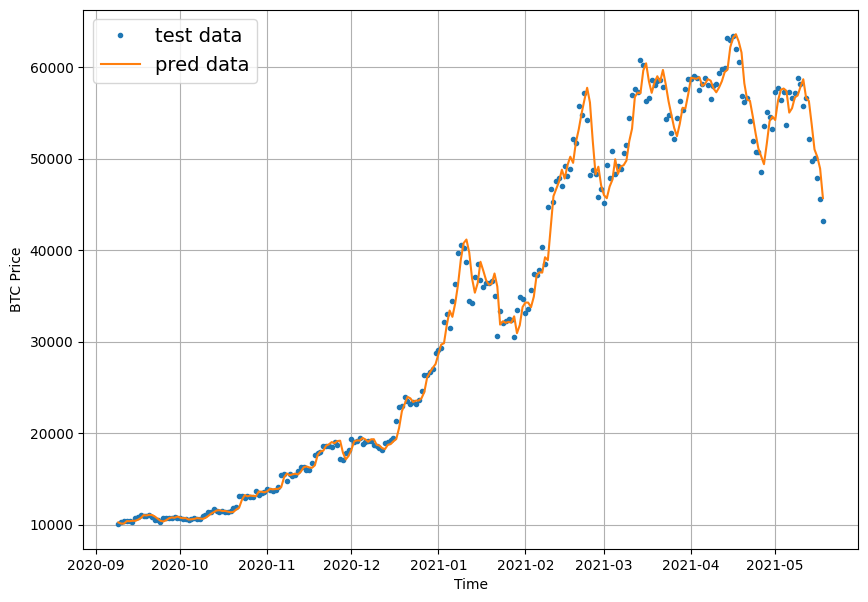

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = model_2_preds, start=offset, format="-", label="pred data")

## model 3: Dense (window = 30, horizon=7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2200, 551, 2200, 551)

In [ ]:

import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON), # linear activation is the same as having no activation
], name="model_3") # name our model so we can save it 

# 2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_3 = model_3.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 11s - loss: 2908.3477 - mae: 2908.3477 - mse: 34114408.0000

18/18 [==============================] - 2s 54ms/step - loss: 1325.7009 - mae: 1325.7009 - mse: 10718356.0000 - val_loss: 2762.0862 - val_mae: 2762.0862 - val_mse: 20306612.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 390.8734 - mae: 390.8734 - mse: 677393.0625

18/18 [==============================] - 1s 42ms/step - loss: 475.7194 - mae: 475.7194 - mse: 1090542.3750 - val_loss: 2222.9497 - val_mae: 2222.9497 - val_mse: 14137658.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 372.8473 - mae: 372.8473 - mse: 504012.0625

18/18 [==============================] - 1s 43ms/step - loss: 373.3925 - mae: 373.3925 - mse: 684746.6250 - val_loss: 1881.8872 - val_mae: 1881.8872 - val_mse: 10800268.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 399.1090 - mae: 399.1090 - mse: 761900.5000

18/18 [==============================] - 1s 41ms/step - loss: 334.7305 - mae: 334.7305 - mse: 564177.5000 - val_loss: 1611.5681 - val_mae: 1611.5681 - val_mse: 8216454.5000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 316.3159 - mae: 316.3159 - mse: 495773.5625 - val_loss: 1788.2246 - val_mae: 1788.2246 - val_mse: 9660448.0000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 301.6476 - mae: 301.6476 - mse: 455413.0625 - val_loss: 1630.8268 - val_mae: 1630.8268 - val_mse: 8304987.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 264.0046 - mae: 264.0046 - mse: 395469.9375

18/18 [==============================] - 1s 40ms/step - loss: 287.5664 - mae: 287.5664 - mse: 421384.0312 - val_loss: 1498.4020 - val_mae: 1498.4020 - val_mse: 7289141.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 250.0131 - mae: 250.0131 - mse: 280465.5625

18/18 [==============================] - 1s 42ms/step - loss: 285.2485 - mae: 285.2485 - mse: 402967.0312 - val_loss: 1477.4912 - val_mae: 1477.4912 - val_mse: 7165767.0000
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 278.7001 - mae: 278.7001 - mse: 390001.8438 - val_loss: 1654.9689 - val_mae: 1654.9689 - val_mse: 8056162.0000
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 280.0135 - mae: 280.0135 - mse: 381411.3125 - val_loss: 1510.2605 - val_mae: 1510.2605 - val_mse: 7055101.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 277.8492 - mae: 277.8492 - mse: 398266.8125

18/18 [==============================] - 1s 42ms/step - loss: 269.5297 - mae: 269.5297 - mse: 366573.3438 - val_loss: 1416.2533 - val_mae: 1416.2533 - val_mse: 6643767.0000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 265.7905 - mae: 265.7905 - mse: 359711.8438 - val_loss: 1483.5707 - val_mae: 1483.5707 - val_mse: 7039743.0000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 239.9063 - mae: 239.9063 - mse: 321758.4375

18/18 [==============================] - 1s 43ms/step - loss: 261.8140 - mae: 261.8140 - mse: 352537.9688 - val_loss: 1389.1920 - val_mae: 1389.1920 - val_mse: 6487986.0000
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 260.8033 - mae: 260.8033 - mse: 349689.9062 - val_loss: 1426.3115 - val_mae: 1426.3115 - val_mse: 6630574.0000
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 259.1449 - mae: 259.1449 - mse: 343914.0625 - val_loss: 1478.0422 - val_mae: 1478.0422 - val_mse: 6771006.0000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 257.0135 - mae: 257.0135 - mse: 338417.4688 - val_loss: 1495.2572 - val_mae: 1495.2572 - val_mse: 6837135.5000
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 258.7466 - mae: 258.7466 - mse: 343177.8750 - val_loss: 1501.4629 - val_mae: 1501.4629 - val_mse: 6898800.5000
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 259.7591 - ma

18/18 [==============================] - 1s 73ms/step - loss: 249.6061 - mae: 249.6061 - mse: 322692.4688 - val_loss: 1370.4847 - val_mae: 1370.4847 - val_mse: 6109690.5000
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 254.1637 - mae: 254.1637 - mse: 328334.0000 - val_loss: 1400.8113 - val_mae: 1400.8113 - val_mse: 6357773.5000
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 270.2188 - mae: 270.2188 - mse: 359581.9688 - val_loss: 1371.4506 - val_mae: 1371.4506 - val_mse: 6202658.0000
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 250.4160 - mae: 250.4160 - mse: 320931.6562 - val_loss: 1582.6506 - val_mae: 1582.6506 - val_mse: 7270760.0000
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 249.5823 - mae: 249.5823 - mse: 317204.0000 - val_loss: 1386.2694 - val_mae: 1386.2694 - val_mse: 6169552.0000
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 224.8780 - mae: 2

18/18 [==============================] - 1s 55ms/step - loss: 244.3480 - mae: 244.3480 - mse: 312551.1250 - val_loss: 1370.1686 - val_mae: 1370.1686 - val_mse: 6053786.5000
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 248.0377 - mae: 248.0377 - mse: 311961.6250 - val_loss: 1415.4167 - val_mae: 1415.4167 - val_mse: 6286413.5000
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 249.1857 - mae: 249.1857 - mse: 317863.2812 - val_loss: 1373.5898 - val_mae: 1373.5898 - val_mse: 6075888.0000
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 244.1580 - mae: 244.1580 - mse: 304269.0000

18/18 [==============================] - 1s 61ms/step - loss: 248.7453 - mae: 248.7453 - mse: 322641.6875 - val_loss: 1337.5383 - val_mae: 1337.5383 - val_mse: 5955945.0000
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 240.3302 - mae: 240.3302 - mse: 301329.0000

18/18 [==============================] - 1s 70ms/step - loss: 241.7456 - mae: 241.7456 - mse: 303308.0000 - val_loss: 1327.6376 - val_mae: 1327.6376 - val_mse: 5870012.5000
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 245.4978 - mae: 245.4978 - mse: 313975.4062

18/18 [==============================] - 2s 93ms/step - loss: 244.7733 - mae: 244.7733 - mse: 309297.1562 - val_loss: 1323.1082 - val_mae: 1323.1082 - val_mse: 5829250.0000
Epoch 33/100
18/18 [==============================] - 0s 21ms/step - loss: 240.5744 - mae: 240.5744 - mse: 305047.8125 - val_loss: 1337.3262 - val_mae: 1337.3262 - val_mse: 5894604.5000
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 240.9376 - mae: 240.9376 - mse: 303547.8125 - val_loss: 1383.7844 - val_mae: 1383.7844 - val_mse: 6130884.0000
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 246.9251 - mae: 246.9251 - mse: 310215.4688 - val_loss: 1396.0114 - val_mae: 1396.0114 - val_mse: 6172650.0000
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 242.4012 - mae: 242.4012 - mse: 307657.7500 - val_loss: 1454.2008 - val_mae: 1454.2008 - val_mse: 6689542.0000
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 260.8655 - m

18/18 [==============================] - 1s 72ms/step - loss: 237.4606 - mae: 237.4606 - mse: 296049.9062 - val_loss: 1322.5411 - val_mae: 1322.5411 - val_mse: 5840064.0000
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 239.3416 - mae: 239.3416 - mse: 302016.2188 - val_loss: 1479.7354 - val_mae: 1479.7354 - val_mse: 6502286.5000
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 241.0577 - mae: 241.0577 - mse: 297533.1562 - val_loss: 1494.2844 - val_mae: 1494.2844 - val_mse: 6676008.0000
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 194.8194 - mae: 194.8194 - mse: 205841.2500

18/18 [==============================] - 1s 42ms/step - loss: 246.0758 - mae: 246.0758 - mse: 310138.3438 - val_loss: 1297.8773 - val_mae: 1297.8773 - val_mse: 5650498.5000
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 233.1497 - mae: 233.1497 - mse: 289055.0000 - val_loss: 1330.1152 - val_mae: 1330.1152 - val_mse: 5762555.0000
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 241.7031 - mae: 241.7031 - mse: 301132.6250 - val_loss: 1318.8882 - val_mae: 1318.8882 - val_mse: 5809450.5000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 235.7558 - mae: 235.7558 - mse: 294914.8750 - val_loss: 1563.3264 - val_mae: 1563.3264 - val_mse: 6965520.0000
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 247.5197 - mae: 247.5197 - mse: 309870.3750 - val_loss: 1319.2384 - val_mae: 1319.2384 - val_mse: 5810708.0000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 237.8482 - ma

18/18 [==============================] - 1s 43ms/step - loss: 232.0909 - mae: 232.0909 - mse: 284840.6562 - val_loss: 1282.0688 - val_mae: 1282.0688 - val_mse: 5587516.5000
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 233.1802 - mae: 233.1802 - mse: 288931.0312 - val_loss: 1292.3729 - val_mae: 1292.3729 - val_mse: 5645940.5000
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 234.1428 - mae: 234.1428 - mse: 284083.5625 - val_loss: 1341.7140 - val_mae: 1341.7140 - val_mse: 5891754.0000
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 229.5161 - mae: 229.5161 - mse: 283694.4375 - val_loss: 1310.6525 - val_mae: 1310.6525 - val_mse: 5624217.5000
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 235.5417 - mae: 235.5417 - mse: 291931.9688 - val_loss: 1306.5781 - val_mae: 1306.5781 - val_mse: 5646930.5000
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 231.4026 - ma

18/18 [==============================] - 1s 53ms/step - loss: 236.2726 - mae: 236.2726 - mse: 290981.0625 - val_loss: 1264.8475 - val_mae: 1264.8475 - val_mse: 5453846.5000
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 234.1884 - mae: 234.1884 - mse: 291028.0000 - val_loss: 1355.6064 - val_mae: 1355.6064 - val_mse: 5844769.5000
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 231.2999 - mae: 231.2999 - mse: 283431.2812 - val_loss: 1484.3676 - val_mae: 1484.3676 - val_mse: 6685820.5000
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 235.2041 - mae: 235.2041 - mse: 288119.1875 - val_loss: 1289.4292 - val_mae: 1289.4292 - val_mse: 5495057.0000
Epoch 68/100
18/18 [==============================] - 0s 9ms/step - loss: 233.0525 - mae: 233.0525 - mse: 282548.0625 - val_loss: 1337.0691 - val_mae: 1337.0691 - val_mse: 5772016.5000
Epoch 69/100
18/18 [==============================] - 0s 11ms/step - loss: 228.5485 - m

18/18 [==============================] - 2s 88ms/step - loss: 230.5842 - mae: 230.5842 - mse: 280563.4688 - val_loss: 1264.5347 - val_mae: 1264.5347 - val_mse: 5404077.5000
Epoch 71/100
11/18 [=================>............] - ETA: 0s - loss: 207.8154 - mae: 207.8154 - mse: 232938.7344

18/18 [==============================] - 1s 85ms/step - loss: 225.3932 - mae: 225.3932 - mse: 276126.9375 - val_loss: 1260.5774 - val_mae: 1260.5774 - val_mse: 5353068.5000
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 234.0843 - mae: 234.0843 - mse: 292088.5625

18/18 [==============================] - 1s 80ms/step - loss: 229.2841 - mae: 229.2841 - mse: 275013.9375 - val_loss: 1248.4985 - val_mae: 1248.4985 - val_mse: 5342220.5000
Epoch 73/100
15/18 [========================>.....] - ETA: 0s - loss: 226.0128 - mae: 226.0128 - mse: 273709.2812

18/18 [==============================] - 1s 62ms/step - loss: 225.7786 - mae: 225.7786 - mse: 273362.1250 - val_loss: 1248.2637 - val_mae: 1248.2637 - val_mse: 5298509.5000
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 227.7370 - mae: 227.7370 - mse: 277630.4062 - val_loss: 1356.3857 - val_mae: 1356.3857 - val_mse: 5808903.0000
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 225.7806 - mae: 225.7806 - mse: 272198.7500 - val_loss: 1443.6003 - val_mae: 1443.6003 - val_mse: 6413937.5000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 229.8892 - mae: 229.8892 - mse: 278419.8750 - val_loss: 1252.8402 - val_mae: 1252.8402 - val_mse: 5336500.0000
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 229.4790 - mae: 229.4790 - mse: 279879.6562 - val_loss: 1251.3143 - val_mae: 1251.3143 - val_mse: 5312493.5000
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 233.2970 - ma

18/18 [==============================] - 1s 41ms/step - loss: 224.4848 - mae: 224.4848 - mse: 269248.5312 - val_loss: 1238.2098 - val_mae: 1238.2098 - val_mse: 5232341.5000
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 224.0917 - mae: 224.0917 - mse: 271602.8750 - val_loss: 1294.5902 - val_mae: 1294.5902 - val_mse: 5579815.5000
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 231.0531 - mae: 231.0531 - mse: 276529.4375 - val_loss: 1381.6240 - val_mae: 1381.6240 - val_mse: 5961108.5000
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 230.5537 - mae: 230.5537 - mse: 276680.6875 - val_loss: 1517.8552 - val_mae: 1517.8552 - val_mse: 6692632.5000
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 233.2981 - mae: 233.2981 - mse: 278919.4688 - val_loss: 1330.9128 - val_mae: 1330.9128 - val_mse: 5752507.0000
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 233.2799 - ma

18/18 [==============================] - 1s 41ms/step - loss: 226.2452 - mae: 226.2452 - mse: 271592.8750 - val_loss: 1233.3375 - val_mae: 1233.3375 - val_mse: 5324092.0000
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 225.3987 - mae: 225.3987 - mse: 272661.5625 - val_loss: 1358.4436 - val_mae: 1358.4436 - val_mse: 5764653.5000
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 227.5190 - mae: 227.5190 - mse: 272289.6250 - val_loss: 1274.6121 - val_mae: 1274.6121 - val_mse: 5426254.5000
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 225.9222 - mae: 225.9222 - mse: 269599.3750 - val_loss: 1283.7571 - val_mae: 1283.7571 - val_mse: 5501091.5000
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 231.4156 - mae: 231.4156 - mse: 278206.3125 - val_loss: 1432.9277 - val_mae: 1432.9277 - val_mse: 6207547.5000
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 232.3637 - ma

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1372.0345 - mae: 1372.0345 - mse: 5889631.0000


[1372.0345458984375, 1372.0345458984375, 5889631.0]

In [ ]:
mmodel_3 = tf.keras.models.load_model("model_experiments/model_3/")
model_3.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 1372.0345 - mae: 1372.0345 - mse: 5889631.0000


[1372.0345458984375, 1372.0345458984375, 5889631.0]

In [ ]:
model_3_preds = make_preds(model_3,input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


Make our evaluation function  work for larger horizons

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_3_preds)
model_3_results

{'mae': 1372.0348,
 'mape': 6.139363,
 'mase': 1.9989573,
 'mse': 5889630.0,
 'rmse': 2426.856}

In [ ]:
 model_3_results, model_2_results, naive_results

({'mae': 1372.0348,
  'mape': 6.139363,
  'mase': 1.9989573,
  'mse': 5889630.0,
  'rmse': 2426.856},
 {'mae': 626.7851,
  'mape': 2.8355415,
  'mase': 1.0956264,
  'mse': 1361304.4,
  'rmse': 1166.7495},
 {'mae': 567.9802,
  'mape': 2.5165248,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362})

In [ ]:
model_3_preds.shape, test_labels[:,0].shape

(TensorShape([551, 7]), (551,))

We've made and evaluated prediction with model_3, let's visualize, visualize, visualize!

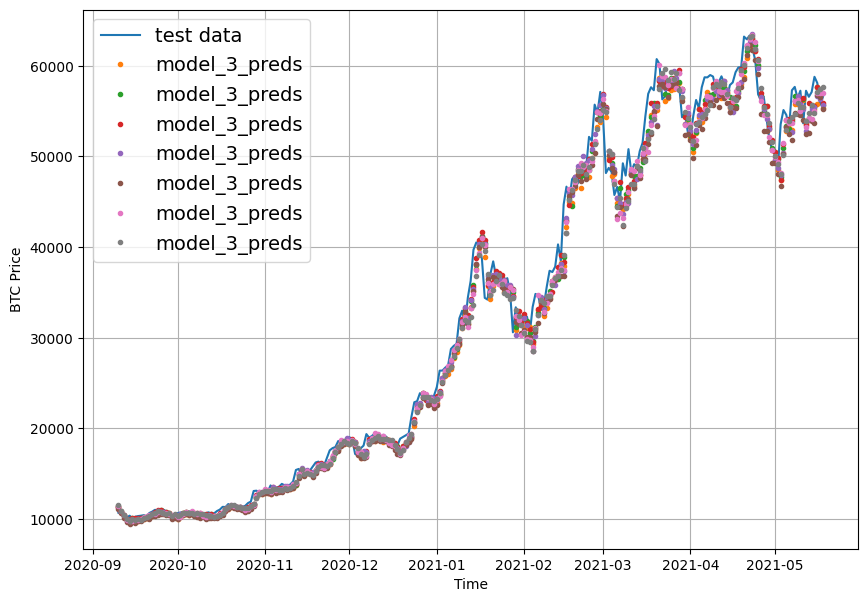

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0],format="-", start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = model_3_preds, start=offset, label="model_3_preds")

In [ ]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([8963.436, 9087.767, 9058.037, 9025.978, 8949.175, 9057.832,
       8963.378], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9015.087>

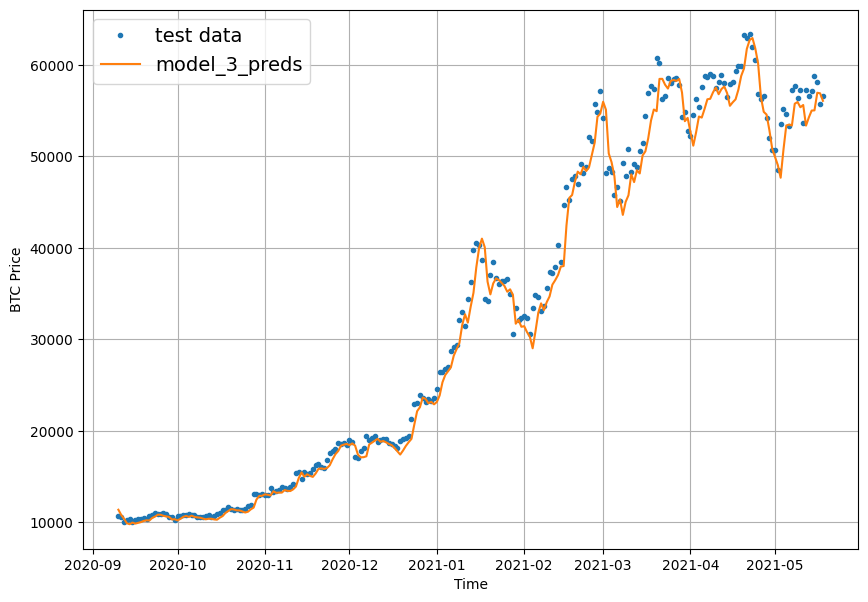

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

In [ ]:
naive_results.values()

dict_values([567.9802, 2.5165248, 0.99957, 1147547.0, 1071.2362])

## Which of our models is performing the best so far?
So we've trained a few models, now let's compare them and see how they've gone...

<Axes: >

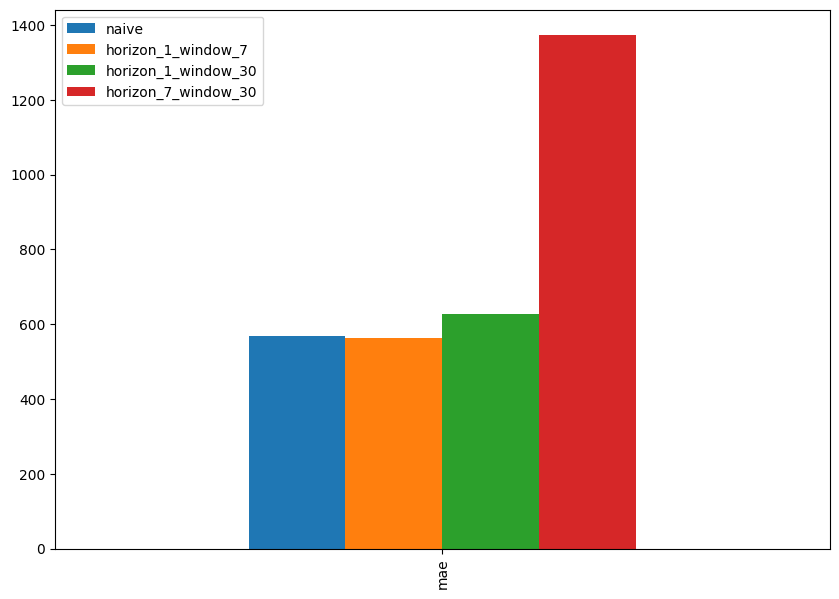

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

In [ ]:

# import matplotlib.pyplot as plt

# plt.plot(list(naive_results.keys()), list(naive_results.values()), marker='o', label='naive_results')
# plt.plot(list(model_2_results.keys()), list(model_2_results.values()), marker='o', label='model_2_results')
# plt.plot(list(model_3_results.keys()), list(model_3_results.values()), marker='o', label='model_3_results')

# plt.legend()
# plt.show()


Note: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current
timestep). In other words, today's value is probably pretty close to yesterday's value. Of course,
this isn't always the case but when it is, a naïve model will often get fairly good results.

**Resource:** For more on how autocorrelation influences a model's predictions, see the article[How (not) to use Machine Learning for time series forecasting: avoiding the pitfalls by Vegard Flovik.](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)

## Model 4 : Conv1D 


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)


# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(full_windows), len(full_labels), len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2780, 2780, 2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of : `batch, timesteps, input_dim`...

However our data isn't in that shape yet

In [ ]:
# Check data input shape
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x 

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)) # add an extra dimension for `input_dim` in the end of the tensor  with -1 and on position 1 with axis=1

In [ ]:
# Test out our lambda layer
print(f"original shape: {x.shape}") # (WINDOW_SIZE)
print(f"expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

original shape: (7,)
expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)
input_shape = train_windows.shape[1:]

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(128, kernel_size=5, strides=1, padding="causal", activation="relu"), # Add a Flatten layer to collapse the spatial dimensions
    tf.keras.layers.Dense(HORIZON) # linear activation is the same as having no activation
], name="model_4") # name our model so we can save it 

# 2. Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam()) 
# 3. Fit the model
history_model_4 = model_4.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_4.name)]);

In [ ]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 574.9968


574.9967651367188

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 574.9968


574.9967651367188

In [ ]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds.shape

18/18 [==============================] - 0s 2ms/step


TensorShape([556])

In [ ]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 574.99677,
 'mape': 2.5855987,
 'mase': 1.01011,
 'mse': 1202983.9,
 'rmse': 1096.8063}

<Axes: >

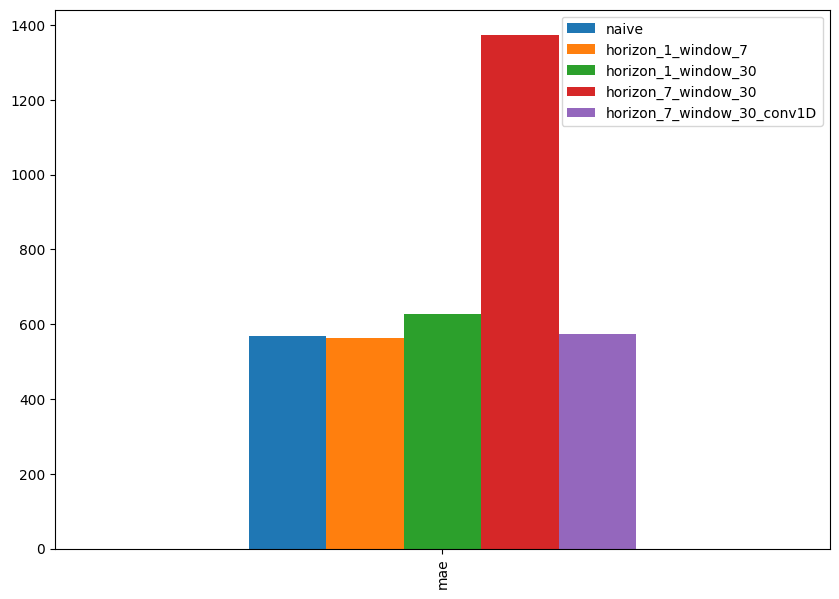

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_7_window_30_conv1D": model_4_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

## model 4 :  Conv1D With using KERAS TUNER 

In [ ]:
#!pip install keras-tuner==1.0.4

In [ ]:
# # function 
# import tensorflow as tf
# from kerastuner import RandomSearch

# def build_model_4_op(hp):
#     model_4_op = tf.keras.Sequential([
#         tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
#         tf.keras.layers.Conv1D(
#             filters=hp.Int('filters', min_value=32, max_value=256, step=32),
#             kernel_size=hp.Choice('kernel_size', values=[3, 5]),
#             strides=1,
#             padding="causal",
#             activation="relu"
#         ),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(HORIZON)
#     ], name="model_4_op")

#     model_4_op.compile(loss="mae",
#                        optimizer=tf.keras.optimizers.Adam(
#                            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#                            ),
#                        metrics=["mae", "mse"])

#     return model_4_op

# tuner = RandomSearch(
#     build_model_4_op,
#     objective='mae',
#     max_trials=20,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='build_model_4_op')

# tuner.search_space_summary()

In [ ]:
# tuner.search(train_windows, train_labels, epochs=100, verbose=1, batch_size=128, validation_data=(test_windows, test_labels))

In [ ]:
# best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
# final_model_4_op = build_model_4_op(best_hp)

In [ ]:
# #input_shape = (train_windows.shape[1])
# final_model_4_op.build(train_windows.shape)
# final_model_4_op.summary()

In [ ]:
# history_model_4_op = final_model_4_op.fit(train_windows,
#                                           train_labels,
#                                           epochs=100,
#                                           verbose=0,
#                                           batch_size=128,
#                                           validation_data=(test_windows, test_labels),
#                                           callbacks=[create_model_checkpoint(model_name=final_model_4_op.name)])

In [ ]:
# final_model_4_op.evaluate(test_windows, test_labels)

In [ ]:
# # function
# # Import pandas
# import pandas as pd

# # Obtenir les meilleurs modèles
# best_models = tuner.get_best_models(num_models=20)  # Vous pouvez modifier num_models pour récupérer le nombre de meilleurs modèles que vous souhaitez

# # Créer une liste vide pour stocker les paramètres et les scores
# hyperparameters_scores_list = []

# # Parcourir les trials et ajouter les hyperparamètres et les scores correspondants à la liste
# for trial in tuner.oracle.trials.values():
#     hyperparameters = trial.hyperparameters.values
#     val_loss_mae = trial.score
#     mae = trial.metrics.metrics["loss"].get_best_value()

#     hyperparameters_scores = {
#         'filters': hyperparameters['filters'],
#         'kernel_size': hyperparameters['kernel_size'],
#         'learning_rate': hyperparameters['learning_rate'],
#         'val_loss': val_loss_mae,
#         'mae': mae
#     }
#     hyperparameters_scores_list.append(hyperparameters_scores)

# # Convertir la liste en DataFrame pandas
# hyperparameters_scores_df = pd.DataFrame(hyperparameters_scores_list)

# # Trier le DataFrame en fonction de val_loss et sélectionner les meilleurs modèles
# hyperparameters_scores_df = hyperparameters_scores_df.sort_values(by='mae', ascending=False).head(len(best_models));

# # Réinitialiser l'index du DataFrame
# hyperparameters_scores_df.reset_index(drop=True, inplace=True);

In [ ]:
# hyperparameters_scores_df

In [ ]:
# model_4_op_preds = make_preds(final_model_4_op,test_windows)

In [ ]:
# model_4_op_results = evaluate_preds(test_labels,model_4_op_preds)
# model_4_op_results

## Model 5 : RNN (LSTM)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(full_windows), len(full_labels), len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2780, 2780, 2224, 556, 2224, 556)

In [ ]:
# import tensorflow as tf

# # Set random seed for as reproducible results as possible
# tf.random.set_seed(42)
# input_shape = train_windows.shape[1:]

# model_5 = tf.keras.Sequential([
#     # Vous pouvez ajuster le nombre d'unités LSTM et le retour de séquences en fonction de votre modèle.
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)), # add an extra dimension for `input_dim` in the end of the tensor  with -1 and on position 1 with axis=1
#     tf.keras.layers.LSTM(128, return_sequences=True),
#     tf.keras.layers.LSTM(128),
#     tf.keras.layers.LSTM(32, activation="relu"),
#     tf.keras.layers.Dense(HORIZON) # linear activation is the same as having no activation
# ], name="model_5_LSTM") # name our model so we can save it 

# # 2. Compile the model
# model_5.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam()) 
# # 3. Fit the model
# history_model_5 = model_5.fit(train_windows,
#                               train_labels,
#                               epochs=100,
#                               verbose=1,
#                               batch_size=128,
#                               validation_data=(test_windows,test_labels),
#                               callbacks=[create_model_checkpoint(model_name=model_5.name)]);

In [ ]:
# model_5 = tf.keras.models.load_model("model_experiments/model_5/")
# model_5.evaluate(test_windows, test_labels)

In [ ]:
# model_5.evaluate(test_windows, test_labels)

In [ ]:
# model_5_preds = make_preds(model_5, test_windows)

In [ ]:
# model_5_result = evaluate_preds(test_windows, model_5_preds)

In [ ]:
# pd.DataFrame({"naive": naive_results["mae"],
#               "horizon_1_window_7": model_1_results["mae"],
#               "horizon_1_window_30": model_2_results["mae"],
#               "horizon_7_window_30": model_3_results["mae"],
#               "horizon_1_window_7_conv1D": model_4_results["mae"],
#               "horizon_1_window_7_LSTM":model_5_result["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

## Model 5 : RNN (LSTM)  with using KERAS TUNER

In [ ]:
# import tensorflow as tf
# from kerastuner import RandomSearch

# # Set random seed for as reproducible results as possible
# tf.random.set_seed(42)
# input_shape = train_windows.shape[1:]
# # Define the model building function
# def build_model(hp):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=input_shape),
#         tf.keras.layers.LSTM(hp.Int('units_1', min_value=64, max_value=256, step=32), return_sequences=True),
#         tf.keras.layers.LSTM(hp.Int('units_2', min_value=64, max_value=256, step=32)),
#         tf.keras.layers.Dense(hp.Int('units_3', min_value=16, max_value=128, step=16), activation="relu"),
#         tf.keras.layers.Dense(HORIZON)
#     ])

#     model.compile(loss="mae",
#                   optimizer=tf.keras.optimizers.Adam(
#                       hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#                   ))
#     return model

# # Configure the tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=30,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='model_5_LSTM'
# )


In [ ]:
# # Search for the best hyperparameters
# tuner.search(train_windows, train_labels,
#              epochs=100,
#              verbose=1,
#              batch_size=128,
#              validation_data=(test_windows, test_labels),
#              callbacks=[create_model_checkpoint(model_name='model_5_LSTM')])


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
units_1           |96                |192               
units_2           |128               |96                
units_3           |80                |96                
learning_rate     |0.0001            |0.01              

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 3162.4902

18/18 [==============================] - 18s 631ms/step - loss: 3158.2627 - val_loss: 20095.8848
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 3157.6211

18/18 [==============================] - 10s 575ms/step - loss: 3157.6211 - val_loss: 20095.2305
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 3156.8110

18/18 [==============================] - 10s 587ms/step - loss: 3156.8110 - val_loss: 20094.2559
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 3167.4302

18/18 [==============================] - 11s 619ms/step - loss: 3155.5925 - val_loss: 20092.7520
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 3176.4065

18/18 [==============================] - 10s 591ms/step - loss: 3153.8535 - val_loss: 20090.7559
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 3162.1838

18/18 [==============================] - 11s 634ms/step - loss: 3151.7712 - val_loss: 20088.5547
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 3145.9546

18/18 [==============================] - 11s 648ms/step - loss: 3149.5295 - val_loss: 20086.2812
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 3147.3176

18/18 [==============================] - 11s 657ms/step - loss: 3147.3176 - val_loss: 20084.1113
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 3145.1772

18/18 [==============================] - 11s 658ms/step - loss: 3145.1772 - val_loss: 20082.0078
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 3143.1155

18/18 [==============================] - 11s 648ms/step - loss: 3143.1155 - val_loss: 20080.0117
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 3141.1177

18/18 [==============================] - 10s 590ms/step - loss: 3141.1177 - val_loss: 20078.0234
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 3139.1824

18/18 [==============================] - 11s 662ms/step - loss: 3139.1824 - val_loss: 20076.1406
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 3149.0002

18/18 [==============================] - 10s 598ms/step - loss: 3137.3281 - val_loss: 20074.3164
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 3104.9434

18/18 [==============================] - 9s 543ms/step - loss: 3135.5303 - val_loss: 20072.5332
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 3133.7454

18/18 [==============================] - 10s 595ms/step - loss: 3133.7454 - val_loss: 20070.7422
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 3131.9529

18/18 [==============================] - 11s 656ms/step - loss: 3131.9529 - val_loss: 20068.9570
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 3112.9517

18/18 [==============================] - 10s 583ms/step - loss: 3130.1550 - val_loss: 20067.1445
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 3134.3840

18/18 [==============================] - 10s 595ms/step - loss: 3128.3440 - val_loss: 20065.3301
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 3146.7002

18/18 [==============================] - 9s 536ms/step - loss: 3126.5186 - val_loss: 20063.4922
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 3124.6697

18/18 [==============================] - 12s 700ms/step - loss: 3124.6697 - val_loss: 20061.6289
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 3117.4026

18/18 [==============================] - 10s 582ms/step - loss: 3122.7932 - val_loss: 20059.7422
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 3132.3604

18/18 [==============================] - 10s 574ms/step - loss: 3120.8857 - val_loss: 20057.8105
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 3100.4866

18/18 [==============================] - 10s 585ms/step - loss: 3118.9458 - val_loss: 20055.8633
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 3132.4290

18/18 [==============================] - 9s 539ms/step - loss: 3116.9795 - val_loss: 20053.8711
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 3114.9805

18/18 [==============================] - 10s 596ms/step - loss: 3114.9805 - val_loss: 20051.8555
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 3112.9487

18/18 [==============================] - 12s 693ms/step - loss: 3112.9487 - val_loss: 20049.8086
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 3110.8872

18/18 [==============================] - 10s 581ms/step - loss: 3110.8872 - val_loss: 20047.7285
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 3108.7920

18/18 [==============================] - 10s 581ms/step - loss: 3108.7920 - val_loss: 20045.6152
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 3089.8821

18/18 [==============================] - 9s 552ms/step - loss: 3106.6626 - val_loss: 20043.4668
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 3104.4941

18/18 [==============================] - 10s 590ms/step - loss: 3104.4941 - val_loss: 20041.2773
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 3100.4563

18/18 [==============================] - 10s 587ms/step - loss: 3102.2939 - val_loss: 20039.0586
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 3102.7219

18/18 [==============================] - 13s 744ms/step - loss: 3100.0588 - val_loss: 20036.8066
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 3097.7876

18/18 [==============================] - 10s 599ms/step - loss: 3097.7876 - val_loss: 20034.5156
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 3095.4785

18/18 [==============================] - 10s 597ms/step - loss: 3095.4785 - val_loss: 20032.1836
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 3090.9336

18/18 [==============================] - 10s 563ms/step - loss: 3093.1335 - val_loss: 20029.8203
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 3090.7551

18/18 [==============================] - 10s 610ms/step - loss: 3090.7551 - val_loss: 20027.4199
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 3088.3403

18/18 [==============================] - 10s 590ms/step - loss: 3088.3403 - val_loss: 20024.9883
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 3085.8889

18/18 [==============================] - 10s 592ms/step - loss: 3085.8889 - val_loss: 20022.5176
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 3073.0156

18/18 [==============================] - 10s 615ms/step - loss: 3083.4016 - val_loss: 20020.0117
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 3076.0073

18/18 [==============================] - 13s 763ms/step - loss: 3080.8770 - val_loss: 20017.4648
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 3082.6418

18/18 [==============================] - 9s 542ms/step - loss: 3078.3162 - val_loss: 20014.8867
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 3075.7190

18/18 [==============================] - 10s 614ms/step - loss: 3075.7190 - val_loss: 20012.2695
Epoch 43/100
18/18 [==============================] - ETA: 0s - loss: 3073.0837

18/18 [==============================] - 10s 586ms/step - loss: 3073.0837 - val_loss: 20009.6133
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 3077.7510

18/18 [==============================] - 10s 586ms/step - loss: 3070.4128 - val_loss: 20006.9199
Epoch 45/100
17/18 [===========================>..] - ETA: 0s - loss: 3069.0720

18/18 [==============================] - 10s 586ms/step - loss: 3067.7065 - val_loss: 20004.1953
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 3064.9641

18/18 [==============================] - 9s 550ms/step - loss: 3064.9641 - val_loss: 20001.4336
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 3057.3469

18/18 [==============================] - 10s 581ms/step - loss: 3062.1848 - val_loss: 19998.6367
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 3056.7336

18/18 [==============================] - 10s 588ms/step - loss: 3059.3694 - val_loss: 19995.7988
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 3048.5183

18/18 [==============================] - 10s 585ms/step - loss: 3056.5178 - val_loss: 19992.9297
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 3065.9612

18/18 [==============================] - 14s 818ms/step - loss: 3053.6296 - val_loss: 19990.0215
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 3041.8171

18/18 [==============================] - 10s 593ms/step - loss: 3050.7046 - val_loss: 19987.0742
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 3042.6055

18/18 [==============================] - 9s 549ms/step - loss: 3047.7444 - val_loss: 19984.0957
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 3044.7488

18/18 [==============================] - 10s 584ms/step - loss: 3044.7488 - val_loss: 19981.0801
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 3041.7170

18/18 [==============================] - 10s 587ms/step - loss: 3041.7170 - val_loss: 19978.0293
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 3039.9238

18/18 [==============================] - 10s 589ms/step - loss: 3038.6499 - val_loss: 19974.9434
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 3035.5471

18/18 [==============================] - 10s 565ms/step - loss: 3035.5471 - val_loss: 19971.8223
Epoch 57/100
18/18 [==============================] - ETA: 0s - loss: 3032.4167

18/18 [==============================] - 10s 593ms/step - loss: 3032.4167 - val_loss: 19968.6699
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 3029.2664

18/18 [==============================] - 10s 601ms/step - loss: 3029.2664 - val_loss: 19965.4883
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 3017.3894

18/18 [==============================] - 11s 663ms/step - loss: 3026.0896 - val_loss: 19962.2734
Epoch 60/100
17/18 [===========================>..] - ETA: 0s - loss: 3023.2646

18/18 [==============================] - 11s 615ms/step - loss: 3022.8813 - val_loss: 19959.0254
Epoch 61/100
17/18 [===========================>..] - ETA: 0s - loss: 3037.5210

18/18 [==============================] - 15s 878ms/step - loss: 3019.6455 - val_loss: 19955.7559
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 3016.3818

18/18 [==============================] - 11s 627ms/step - loss: 3016.3818 - val_loss: 19952.4434
Epoch 63/100
17/18 [===========================>..] - ETA: 0s - loss: 2995.7036

18/18 [==============================] - 10s 572ms/step - loss: 3013.0879 - val_loss: 19949.1016
Epoch 64/100
17/18 [===========================>..] - ETA: 0s - loss: 3020.6228

18/18 [==============================] - 11s 639ms/step - loss: 3009.7634 - val_loss: 19945.7227
Epoch 65/100
17/18 [===========================>..] - ETA: 0s - loss: 3030.7917

18/18 [==============================] - 10s 612ms/step - loss: 3006.4043 - val_loss: 19942.3125
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 3001.9709

18/18 [==============================] - 10s 598ms/step - loss: 3003.0149 - val_loss: 19938.8672
Epoch 67/100
18/18 [==============================] - ETA: 0s - loss: 2999.5913

18/18 [==============================] - 10s 603ms/step - loss: 2999.5913 - val_loss: 19935.3887
Epoch 68/100
18/18 [==============================] - ETA: 0s - loss: 2996.1348

18/18 [==============================] - 10s 559ms/step - loss: 2996.1348 - val_loss: 19931.8789
Epoch 69/100
17/18 [===========================>..] - ETA: 0s - loss: 2984.2563

18/18 [==============================] - 10s 605ms/step - loss: 2992.6494 - val_loss: 19928.3359
Epoch 70/100
18/18 [==============================] - ETA: 0s - loss: 2989.1367

18/18 [==============================] - 10s 596ms/step - loss: 2989.1367 - val_loss: 19924.7559
Epoch 71/100
18/18 [==============================] - ETA: 0s - loss: 2985.5894

18/18 [==============================] - 10s 601ms/step - loss: 2985.5894 - val_loss: 19921.1387
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 2955.3464

18/18 [==============================] - 10s 615ms/step - loss: 2982.0098 - val_loss: 19917.4980
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 2978.4062

18/18 [==============================] - 10s 573ms/step - loss: 2978.4062 - val_loss: 19913.8281
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 2944.3508

18/18 [==============================] - 16s 958ms/step - loss: 2974.7808 - val_loss: 19910.1230
Epoch 75/100
18/18 [==============================] - ETA: 0s - loss: 2971.1265

18/18 [==============================] - 10s 586ms/step - loss: 2971.1265 - val_loss: 19906.3906
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 2967.4531

18/18 [==============================] - 11s 617ms/step - loss: 2967.4531 - val_loss: 19902.6289
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 2970.0576

18/18 [==============================] - 10s 614ms/step - loss: 2963.7434 - val_loss: 19898.8398
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 2970.9019

18/18 [==============================] - 11s 619ms/step - loss: 2960.0242 - val_loss: 19895.0254
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 2948.8079

18/18 [==============================] - 11s 616ms/step - loss: 2956.2991 - val_loss: 19891.1719
Epoch 80/100
17/18 [===========================>..] - ETA: 0s - loss: 2956.5298

18/18 [==============================] - 11s 617ms/step - loss: 2952.5391 - val_loss: 19887.3027
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 2948.5996

18/18 [==============================] - 11s 615ms/step - loss: 2948.7646 - val_loss: 19883.4102
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 2944.9810

18/18 [==============================] - 11s 600ms/step - loss: 2944.9810 - val_loss: 19879.4824
Epoch 83/100
17/18 [===========================>..] - ETA: 0s - loss: 2927.5564

18/18 [==============================] - 10s 608ms/step - loss: 2941.1675 - val_loss: 19875.5410
Epoch 84/100
17/18 [===========================>..] - ETA: 0s - loss: 2942.4189

18/18 [==============================] - 10s 575ms/step - loss: 2937.3706 - val_loss: 19871.5820
Epoch 85/100
17/18 [===========================>..] - ETA: 0s - loss: 2929.6770

18/18 [==============================] - 10s 570ms/step - loss: 2933.6160 - val_loss: 19867.6582
Epoch 86/100
17/18 [===========================>..] - ETA: 0s - loss: 2902.0046

18/18 [==============================] - 10s 586ms/step - loss: 2929.9993 - val_loss: 19863.7598
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 2917.2312

In [ ]:

# # Get the best hyperparameters
# best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Build the best model
# best_model = build_model(best_hp)

# # Fit the best model
# history_best_model = best_model.fit(train_windows,
#                                     train_labels,
#                                     epochs=100,
#                                     verbose=1,
#                                     batch_size=128,
#                                     validation_data=(test_windows, test_labels),
#                                     callbacks=[create_model_checkpoint(model_name='best_model')])

NameError: ignored